In [1]:
df1 <- read.csv('cluster_segments_5k.csv')
df2 <- read.csv('cluster_segments_50k.csv')
df3 <- read.csv('cluster_segments_500k.csv')

In [2]:
dfs <- list(df1, df2, df3)  # your dataframes

In [3]:
all_segments <- unique(unlist(lapply(dfs, function(x) x$Segment)))
all_clusters <- setdiff(colnames(dfs[[1]]), c("Segment", "genes"))

# Make sure all segments are present (add missing ones with zeros)
dfs_filled <- lapply(dfs, function(df) {
  missing_segs <- setdiff(all_segments, df$Segment)
  if (length(missing_segs) > 0) {
    missing_df <- data.frame(
      Segment = missing_segs,
      genes = "",
      matrix(0, nrow = length(missing_segs), ncol = length(all_clusters))
    )
    colnames(missing_df)[-(1:2)] <- all_clusters
    df <- rbind(df, missing_df)
  }
  df[match(all_segments, df$Segment), ]  # Reorder to master order
})


In [4]:
# Extract only numeric cluster columns for averaging
cluster_mats <- lapply(dfs_filled, function(df) {
  df[, all_clusters, drop = FALSE]
})

# Element-wise average
sum_clusters <- Reduce(`+`, cluster_mats)

# Combine with segment and genes columns (keep the first df's for simplicity)
result <- dfs_filled[[1]][, c("Segment", "genes")]
result[, all_clusters] <- sum_clusters


In [5]:
# Combine genes for each segment across all dfs
all_genes <- sapply(seq_along(all_segments), function(i) {
  unique_genes <- unique(unlist(lapply(dfs_filled, function(df) {
    unlist(strsplit(df$genes[i], ","))
  })))
  paste(unique_genes[unique_genes != ""], collapse = ",")
})

result$genes <- all_genes


In [6]:
#result

In [7]:
write.csv(result,'cluster_segments_avg.csv')

In [8]:
#head(result)

In [9]:
result <- result[, !grepl("^X", colnames(result))]

In [10]:
write.csv(result,'cluster_segments_avg.csv', row.names=FALSE)

In [1]:

# 2. Define the lookup for “White_X” → full label
white_lookup <- c(
  "2"  = "White 2 - Central midface",
  "1"  = "White 1 - Whole face",
  "3"  = "White 3 - Rest of face",
  "5"  = "White 5 - Upper central midface",
  "10" = "White 10 - Nasal sidewall and frontal maxillary process",
  "11" = "White 11 - Nose",
  "20" = "White 20 - Upper nasal sidewall",
  "21" = "White 21 - Frontal process of maxillary bone",
  "22" = "White 22 - Nose tip complex",
  "23" = "White 23 - Nasal dorsum",
  "40" = "White 40 - Nasion",
  "41" = "White 41 - Midlateral nasal sidewall",
  "42" = "White 42 - Nasiofacial sulcus",
  "43" = "White 43 - Alarfacial groove",
  "44" = "White 44 - Nasal apex",
  "45" = "White 45 - Nostrils",
  "46" = "White 46 - Upper nasal dorsum",
  "47" = "White 47 - Lower nasal dorsum",
  "4"  = "White 4 - Lower central midface",
  "8"  = "White 8 - Paramedian upper lip 1",
  "9"  = "White 9 - Upper lip region",
  "16" = "White 16 - Nasolabial fold",
  "17" = "White 17 - Paramedian upper lip 2",
  "18" = "White 18 - Central upper cutaneous lip",
  "19" = "White 19 - Upper lip vermilion",
  "32" = "White 32 - Supralateral oral commissure",
  "33" = "White 33 - Upper medial cheek",
  "34" = "White 34 - Lateral subnasale region",
  "35" = "White 35 - Medial root of nasolabial fold",
  "36" = "White 36 - Upper philtrum",
  "37" = "White 37 - Lower philtrum",
  "38" = "White 38 - Central upper lip vermilion",
  "39" = "White 39 - Oral commissure",
  "7"  = "White 7 - Superior midface/forehead region",
  "14" = "White 14 - Forehead",
  "28" = "White 28 - Central forehead",
  "56" = "White 56 - Glabella",
  "57" = "White 57 - Upper central forehead",
  "15" = "White 15 - Lateral upper face",
  "31" = "White 31 - Zygomatic region",
  "63" = "White 63 - Upper cheekbone",
  "62" = "White 62 - Temple",
  "30" = "White 30 - Orbital region",
  "61" = "White 61 - Infraorbital region",
  "60" = "White 60 - Upper orbital region",
  "29" = "White 29 - Supraorbital region",
  "59" = "White 59 - Medial brow strip",
  "58" = "White 58 - Lateral brow strip",
  "6"  = "White 6 - Lower face",
  "13" = "White 13 - Lower jaw region",
  "27" = "White 27 - Chin",
  "54" = "White 54 - Mentum",
  "55" = "White 55 - Lateral chin",
  "26" = "White 26 - Chin and posterior jaw",
  "53" = "White 53 - Anterior chin",
  "52" = "White 52 - Posterior jaw",
  "12" = "White 12 - Cheek region",
  "24" = "White 24 - Middle cheek",
  "25" = "White 25 - Lower cheek",
  "50" = "White 50 - Jowl region",
  "51" = "White 51 - Marionette line",
  "48" = "White 48 - Malar cheek",
  "49" = "White 49 - Buccal cheek"
)

In [2]:
df <- read.csv('cluster_segments_avg.csv')

In [3]:
# Assuming your dataframe is called df and the column is named Segment

# Extract numeric segment id from 'segment_X'
df$segment_id <- sub("segment_", "", df$Segment)

# Map to full label
df$Segment_label <- white_lookup[df$segment_id]

# Optionally, overwrite or rename:
# df$Segment <- white_lookup[df$segment_id]


In [4]:
df$Segment <- white_lookup[df$segment_id]
df$segment_id <- NULL  # Optionally remove the id column


In [5]:
df$Segment_label <- NULL  # Optionally remove the id column

In [6]:
rownames(df) <- df[[1]]
df <- df[-1]

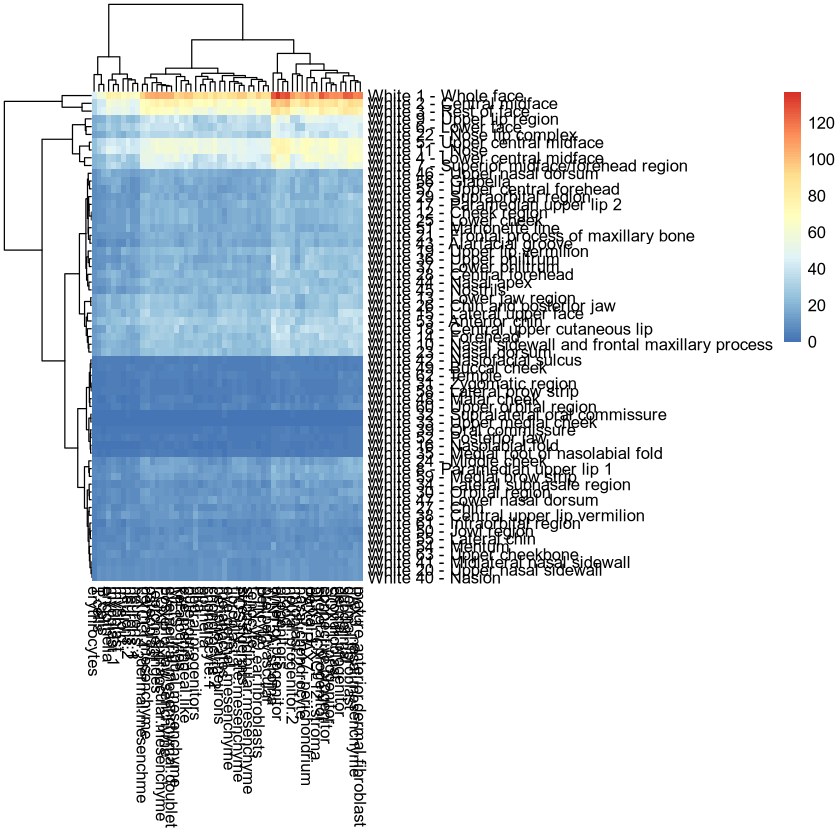

In [7]:
numeric_df <- df[sapply(df, is.numeric)]
pheatmap::pheatmap(numeric_df)

In [8]:
df <- numeric_df

In [9]:
df <- df[, !grepl("doublet", colnames(df))]

In [10]:
df <- df[, !grepl("blood", colnames(df))]

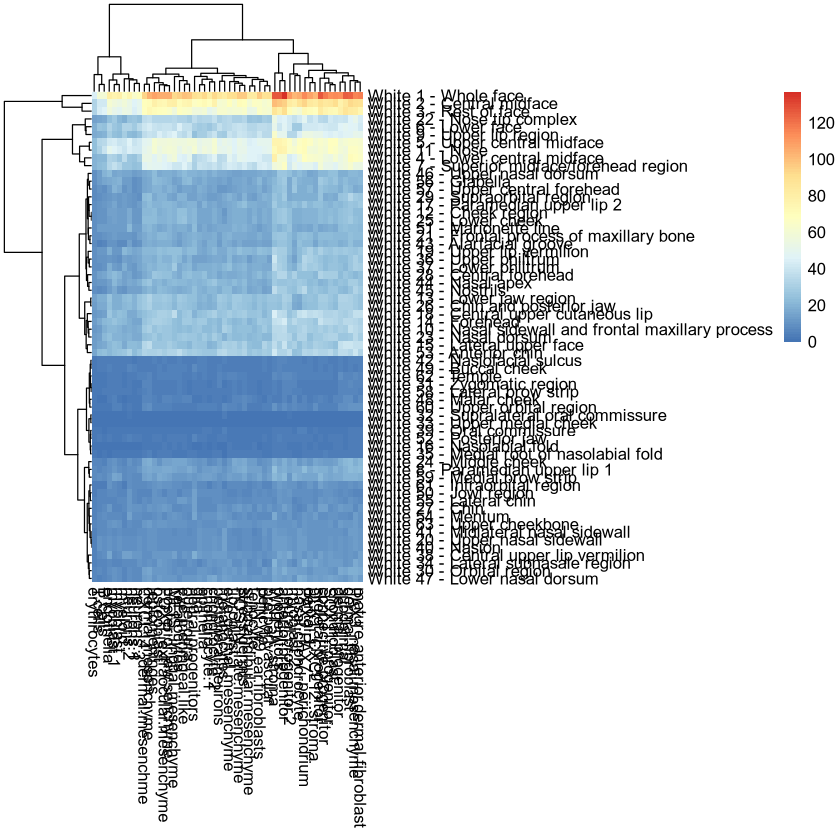

In [11]:
pheatmap::pheatmap(df)

In [12]:
zdf <- t(scale(t(df)))
zdf <- zdf[apply(zdf, 1, function(x) all(is.finite(x))), ]

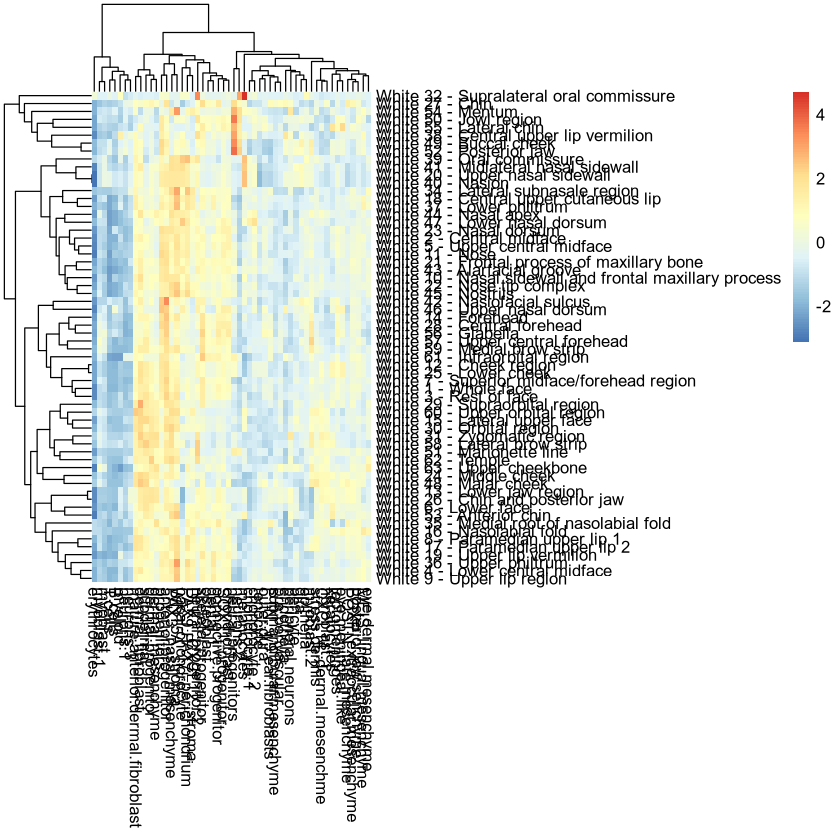

In [13]:
pheatmap::pheatmap(zdf)

In [14]:
pvals <- 1 - pnorm(zdf)
pvals_adj <- matrix(p.adjust(as.vector(pvals), method = "fdr"), nrow = nrow(pvals))
rownames(pvals_adj) <- rownames(zdf)
colnames(pvals_adj) <- colnames(zdf)
sig_fdr <- pvals_adj < 0.05

In [15]:

my_colors <- magma(100)

pheatmap::pheatmap(
  zdf,
  display_numbers = ifelse(sig_fdr, "*", ""),
  color             = my_colors
)


ERROR: Error in magma(100): could not find function "magma"


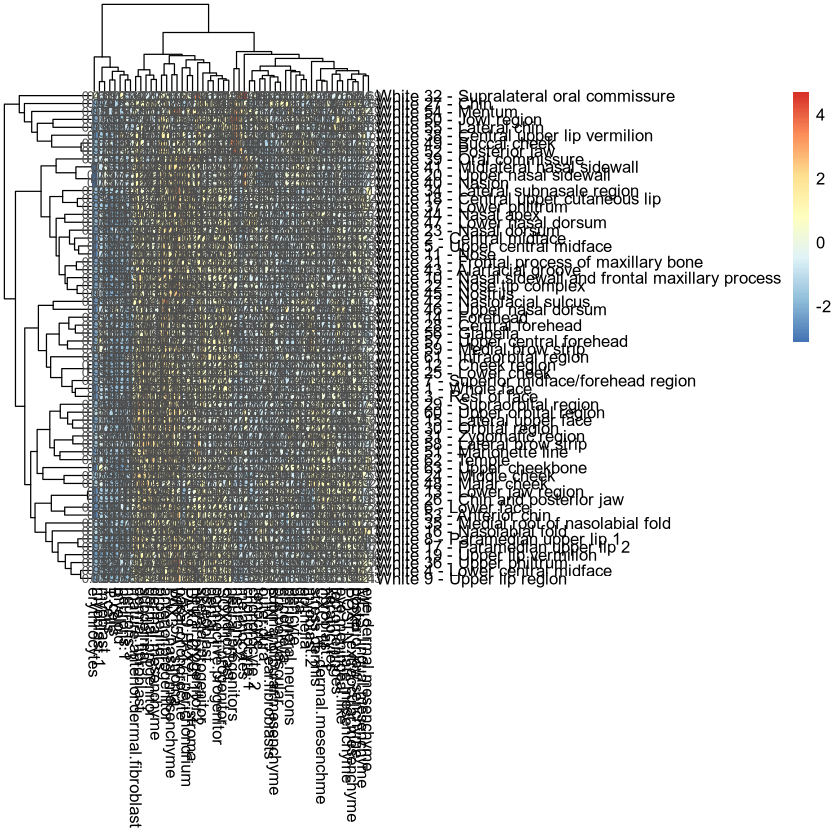

In [16]:
pheatmap::pheatmap(
  zdf,
  display_numbers = signif(pvals, 2)
)

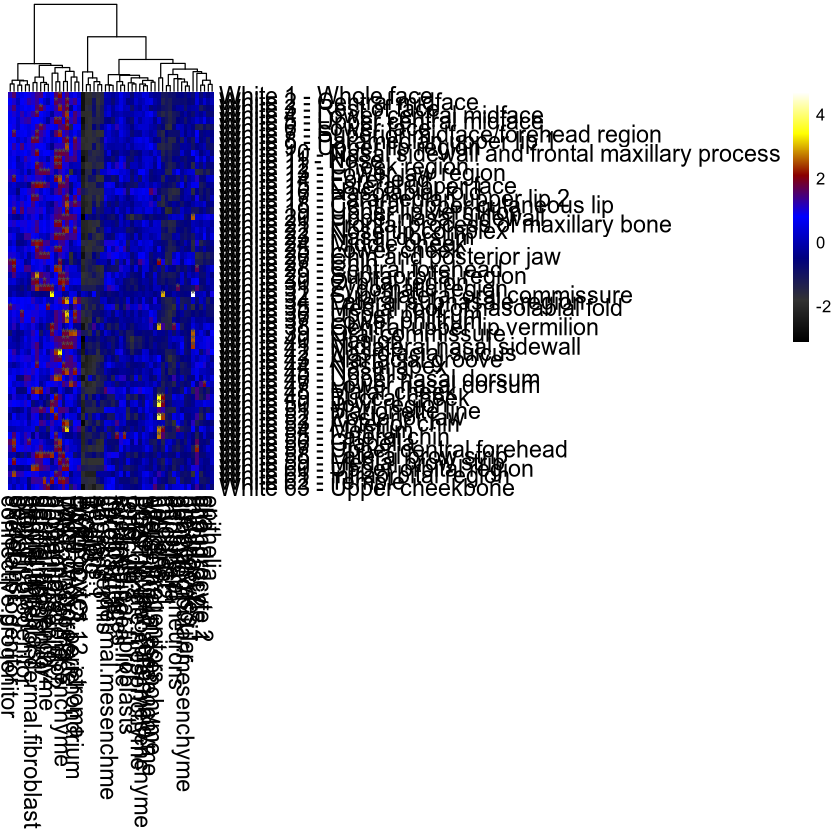

In [17]:
stars <- ifelse(pvals < 0.05, "*", "")
my_colors <- colorRampPalette(c("navy", "white", "darkred"))(255)
my_colors <- colorRampPalette(c("#000040", "darkblue", "blue", "lightblue", "white", "pink", "red", "darkred", "#400000"))(255)
#my_colors <- colorRampPalette(c("navy", "white", "darkred"))(255)
#my_colors <- inferno(100)
my_colors <- colorRampPalette(c("black", "grey20", "navy" , "blue" , "darkred" , "yellow" , "white"))(255)


pheatmap::pheatmap(
  zdf,
  display_numbers = stars,
  clustering_method = "ward.D2",
  cluster_rows = FALSE,
  color = my_colors,
  fontsize_row = 14,
  fontsize_col = 14
)

pdf 
  3

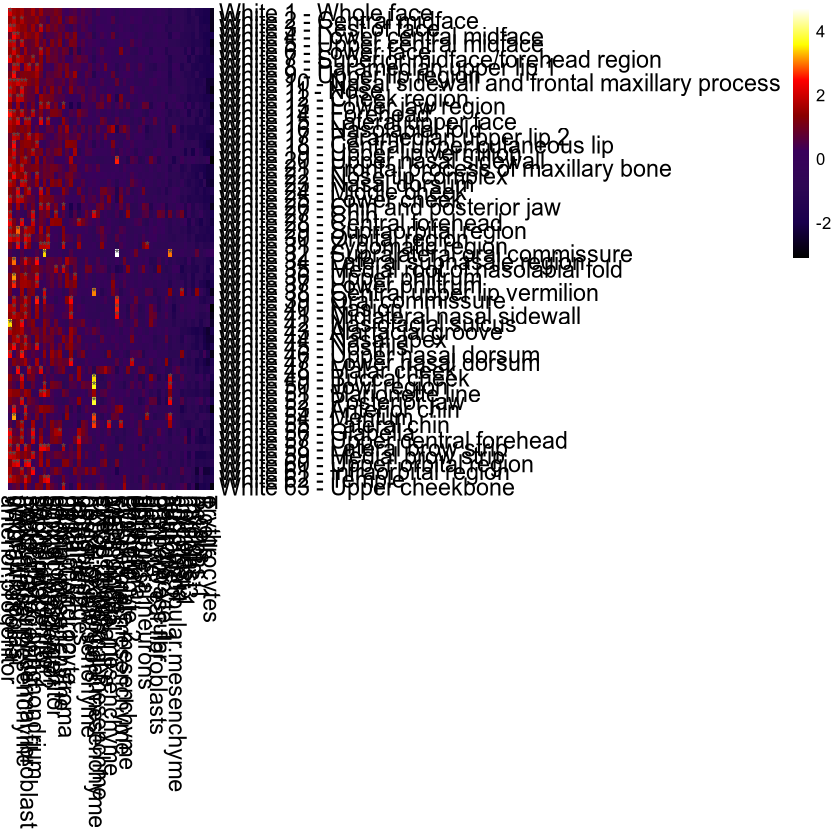

In [18]:
# Suppose mat_plot is your matrix/data frame
col_order <- order(colSums(zdf), decreasing = TRUE)  # or FALSE for ascending
mat_ordered <- zdf[, col_order, drop = FALSE]

# If you have a stars/overlay matrix, reorder that too
stars_ordered <- stars[, col_order, drop = FALSE]



my_colors <- colorRampPalette(c("navy", "white", "darkred"))(255)
#my_colors <- inferno(100)
my_colors <- colorRampPalette(c("black", "#1A004D" , "#2E0854" , "darkred" ,"red" , "yellow" , "white"))(255)

my_colors <- colorRampPalette(
  c("black", "#1A004D", "#2E0854", "white", "firebrick3", "darkred", "#8B0000")
)(255)
my_colors <- colorRampPalette(
  c("black", "#1A004D", "#2E0854", "#3A015C", "darkred", "red", "yellow", "white")
)(255)

pdf("mat_ordered_heatmap.pdf", width = 14, height = 10)

pheatmap::pheatmap(
  mat_ordered,
  display_numbers = stars_ordered,
  color = my_colors,
  cluster_cols = FALSE,
  border_color = NA,
  cluster_rows = FALSE,
  fontsize_row = 14,
  fontsize_col = 14,
  #filename = "mat_ordered_heatmap.pdf",
  #width = 14,  # increase plot size
  #height = 10
)
dev.off()

pdf 
  3

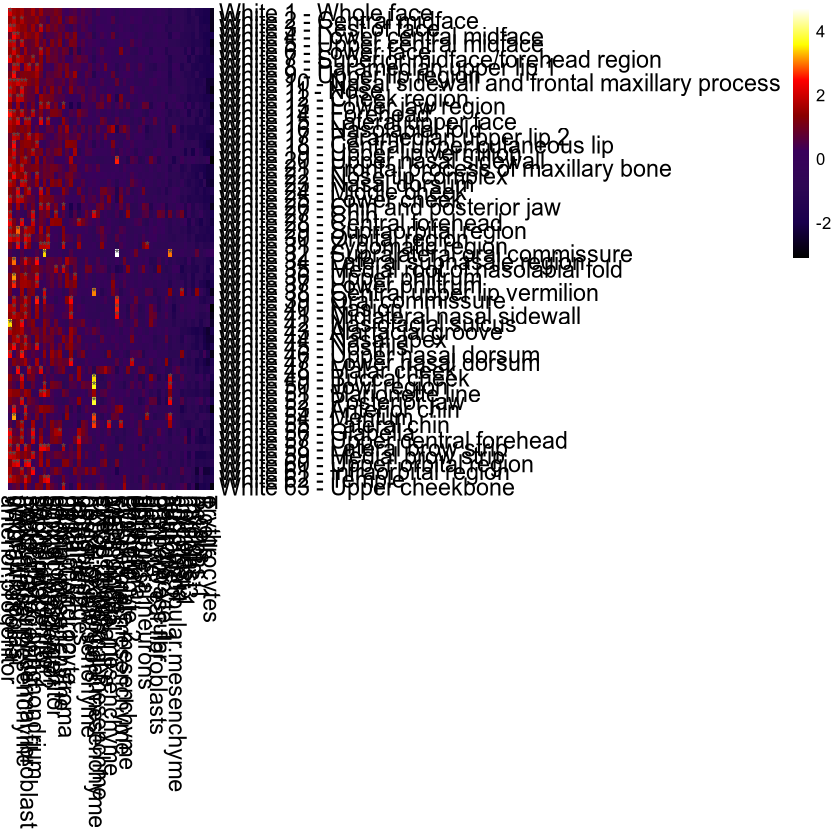

In [19]:
pdf("mat_ordered_heatmap.pdf", width = 14, height = 10, useDingbats = FALSE)  # inches
pheatmap::pheatmap(
  mat_ordered,
  display_numbers = stars_ordered,
  color = my_colors,
  cluster_cols = FALSE,
  border_color = NA,
  cluster_rows = FALSE,
  fontsize_row = 14,
  fontsize_col = 14
)
dev.off()

In [20]:
xx <- pheatmap::pheatmap(
  as.matrix(mat_ordered),
  display_numbers = if (exists("stars_ordered")) as.matrix(stars_ordered) else NULL,
  color = my_colors,
  cluster_cols = FALSE, cluster_rows = FALSE, border_color = NA,
  fontsize_row = 14, fontsize_col = 14,
  silent = TRUE
)

save_pheatmap_pdf <- function(x, filename, width = 14, height = 14) {
  grDevices::pdf(filename, width = width, height = height, useDingbats = FALSE)
  on.exit(grDevices::dev.off(), add = TRUE)
  grid::grid.newpage(); grid::grid.draw(x$gtable)
}

save_pheatmap_pdf(xx, "test.pdf")


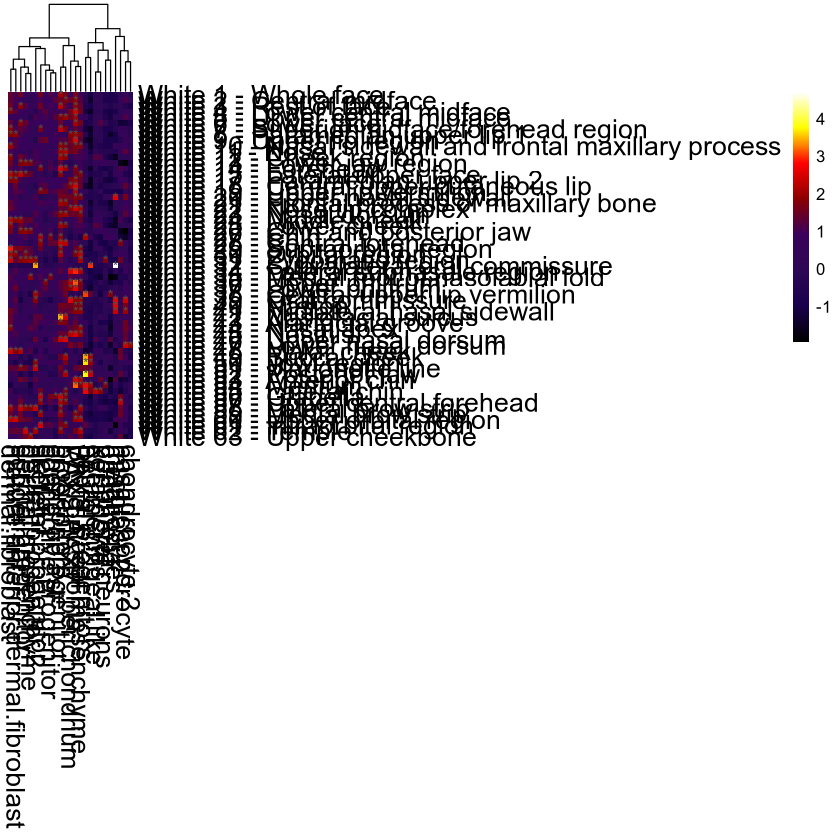

In [21]:
rows_to_keep <- rowSums(stars_ordered == "*") > 0
cols_to_keep <- colSums(stars_ordered == "*") > 0

mat_final <- mat_ordered[rows_to_keep, cols_to_keep, drop=FALSE]
stars_final <- stars_ordered[rows_to_keep, cols_to_keep, drop=FALSE]

pheatmap::pheatmap(
  mat_final,
  display_numbers = stars_final,
  color = my_colors,
  cluster_cols = TRUE,
  border_color = NA,
  cluster_rows = FALSE,
  fontsize_row = 16,
  fontsize_col = 16
)


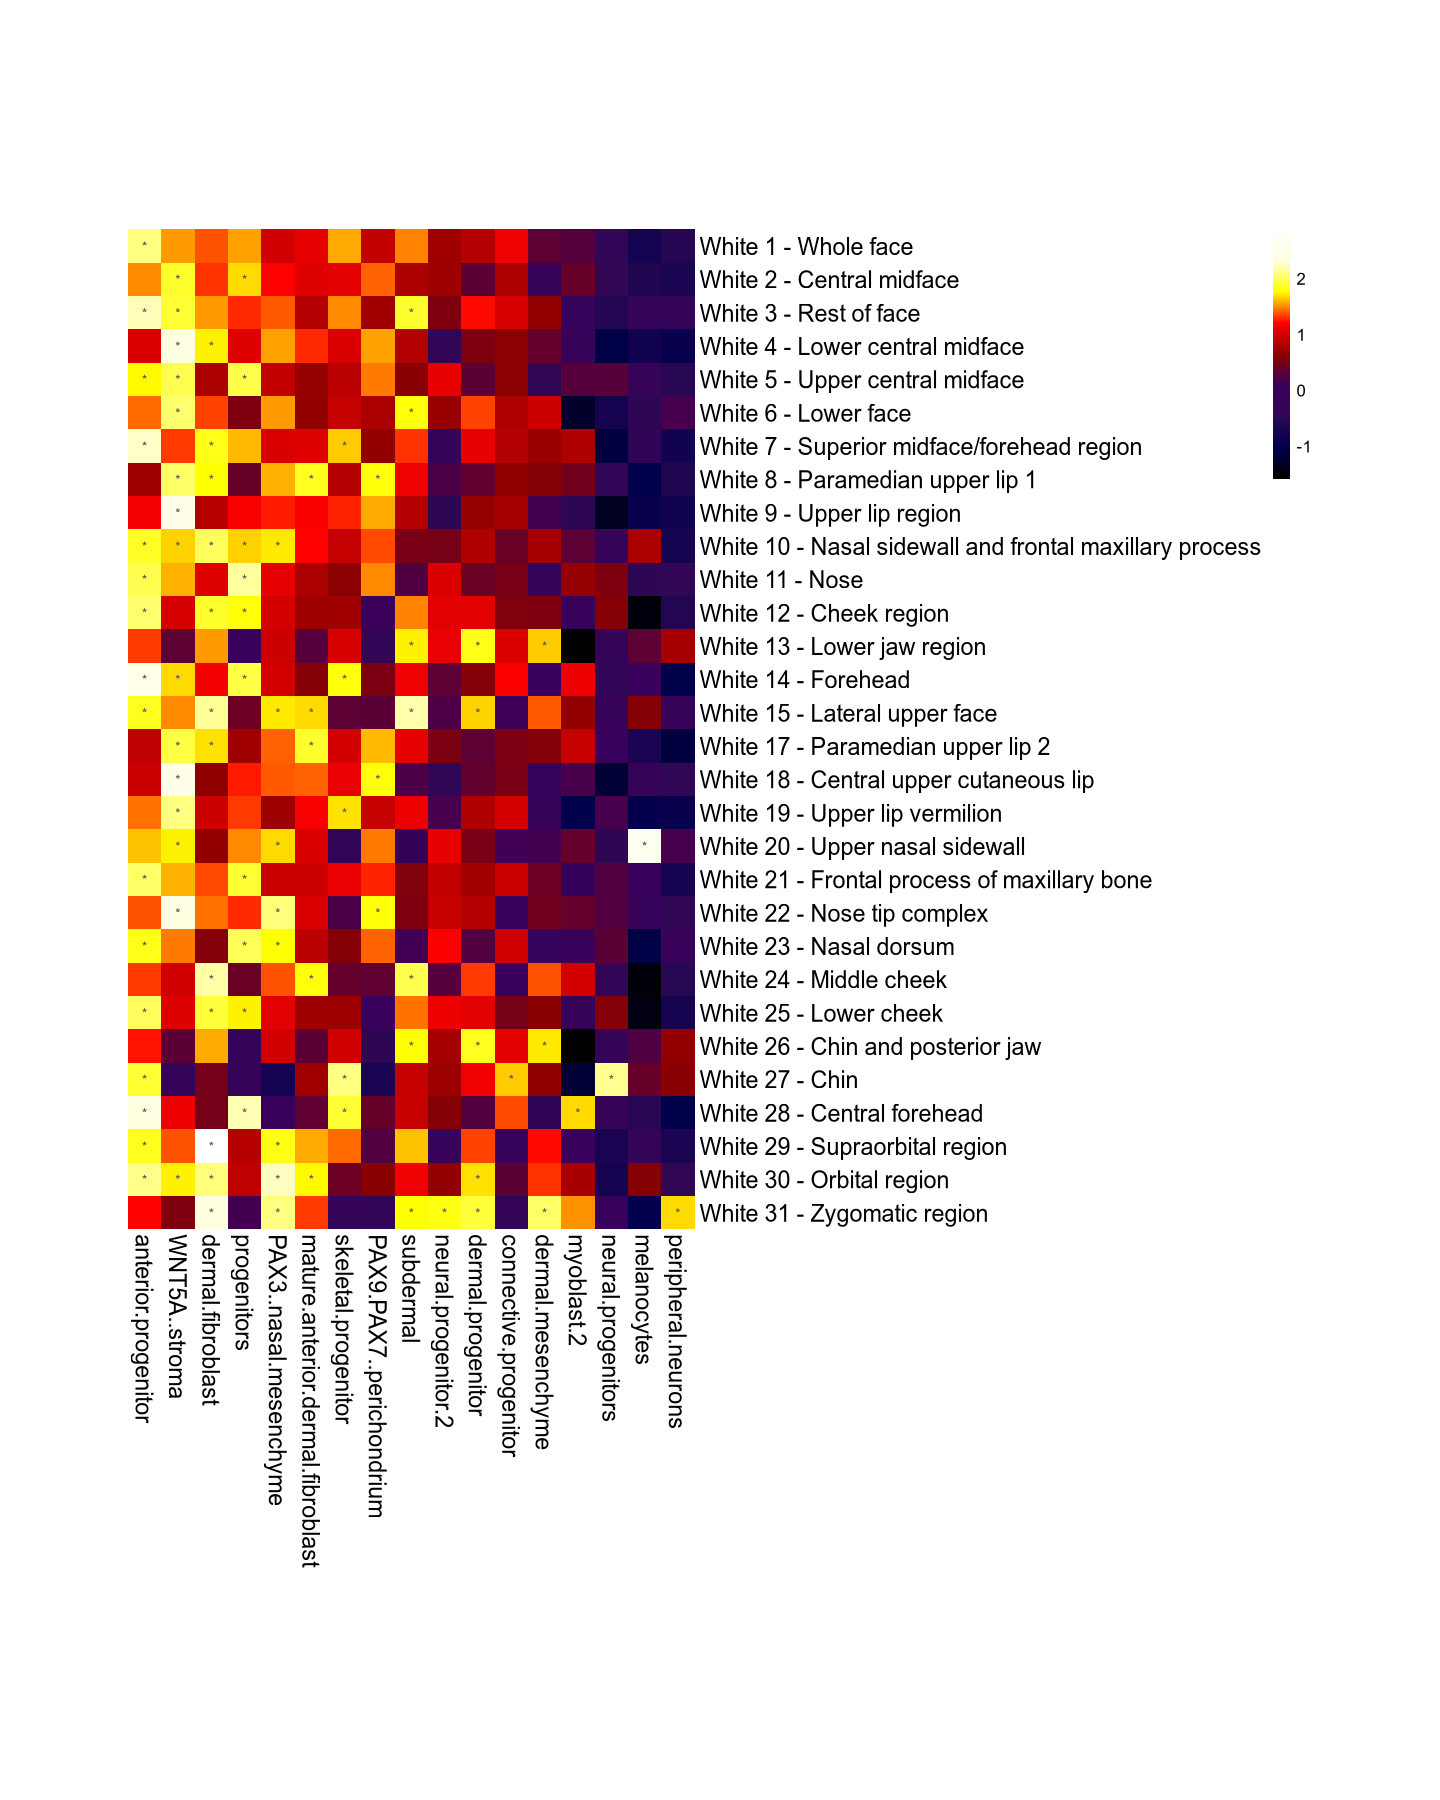

In [22]:
options(repr.plot.width = 12, repr.plot.height = 15)

# Take the top 32 rows

mat_top <- mat_ordered[1:31, , drop = FALSE]
stars_top <- stars_ordered[1:31, , drop = FALSE]

# Keep only columns with at least one star in the selected rows
cols_to_keep <- colSums(stars_top == "*") > 0
rows_to_keep <- rowSums(stars_top == "*") > 0

my_colors <- colorRampPalette(
  c("black", "#00004D", "#2E0854", "#3A015C", "darkred", "red", "yellow", "#FFFFE0", "white"))(255)

mat_final <- mat_top[rows_to_keep, cols_to_keep, drop = FALSE]
stars_final <- stars_top[rows_to_keep, cols_to_keep, drop = FALSE]

pheatmap::pheatmap(
  mat_final,
  display_numbers = stars_final,
  color = my_colors,
  cluster_cols = FALSE,
  cluster_rows = FALSE,
  border_color = NA,
  fontsize_row = 14,
  fontsize_col = 14,
  cellwidth = 20,    # smaller cell width
  cellheight = 20     # smaller cell height
)



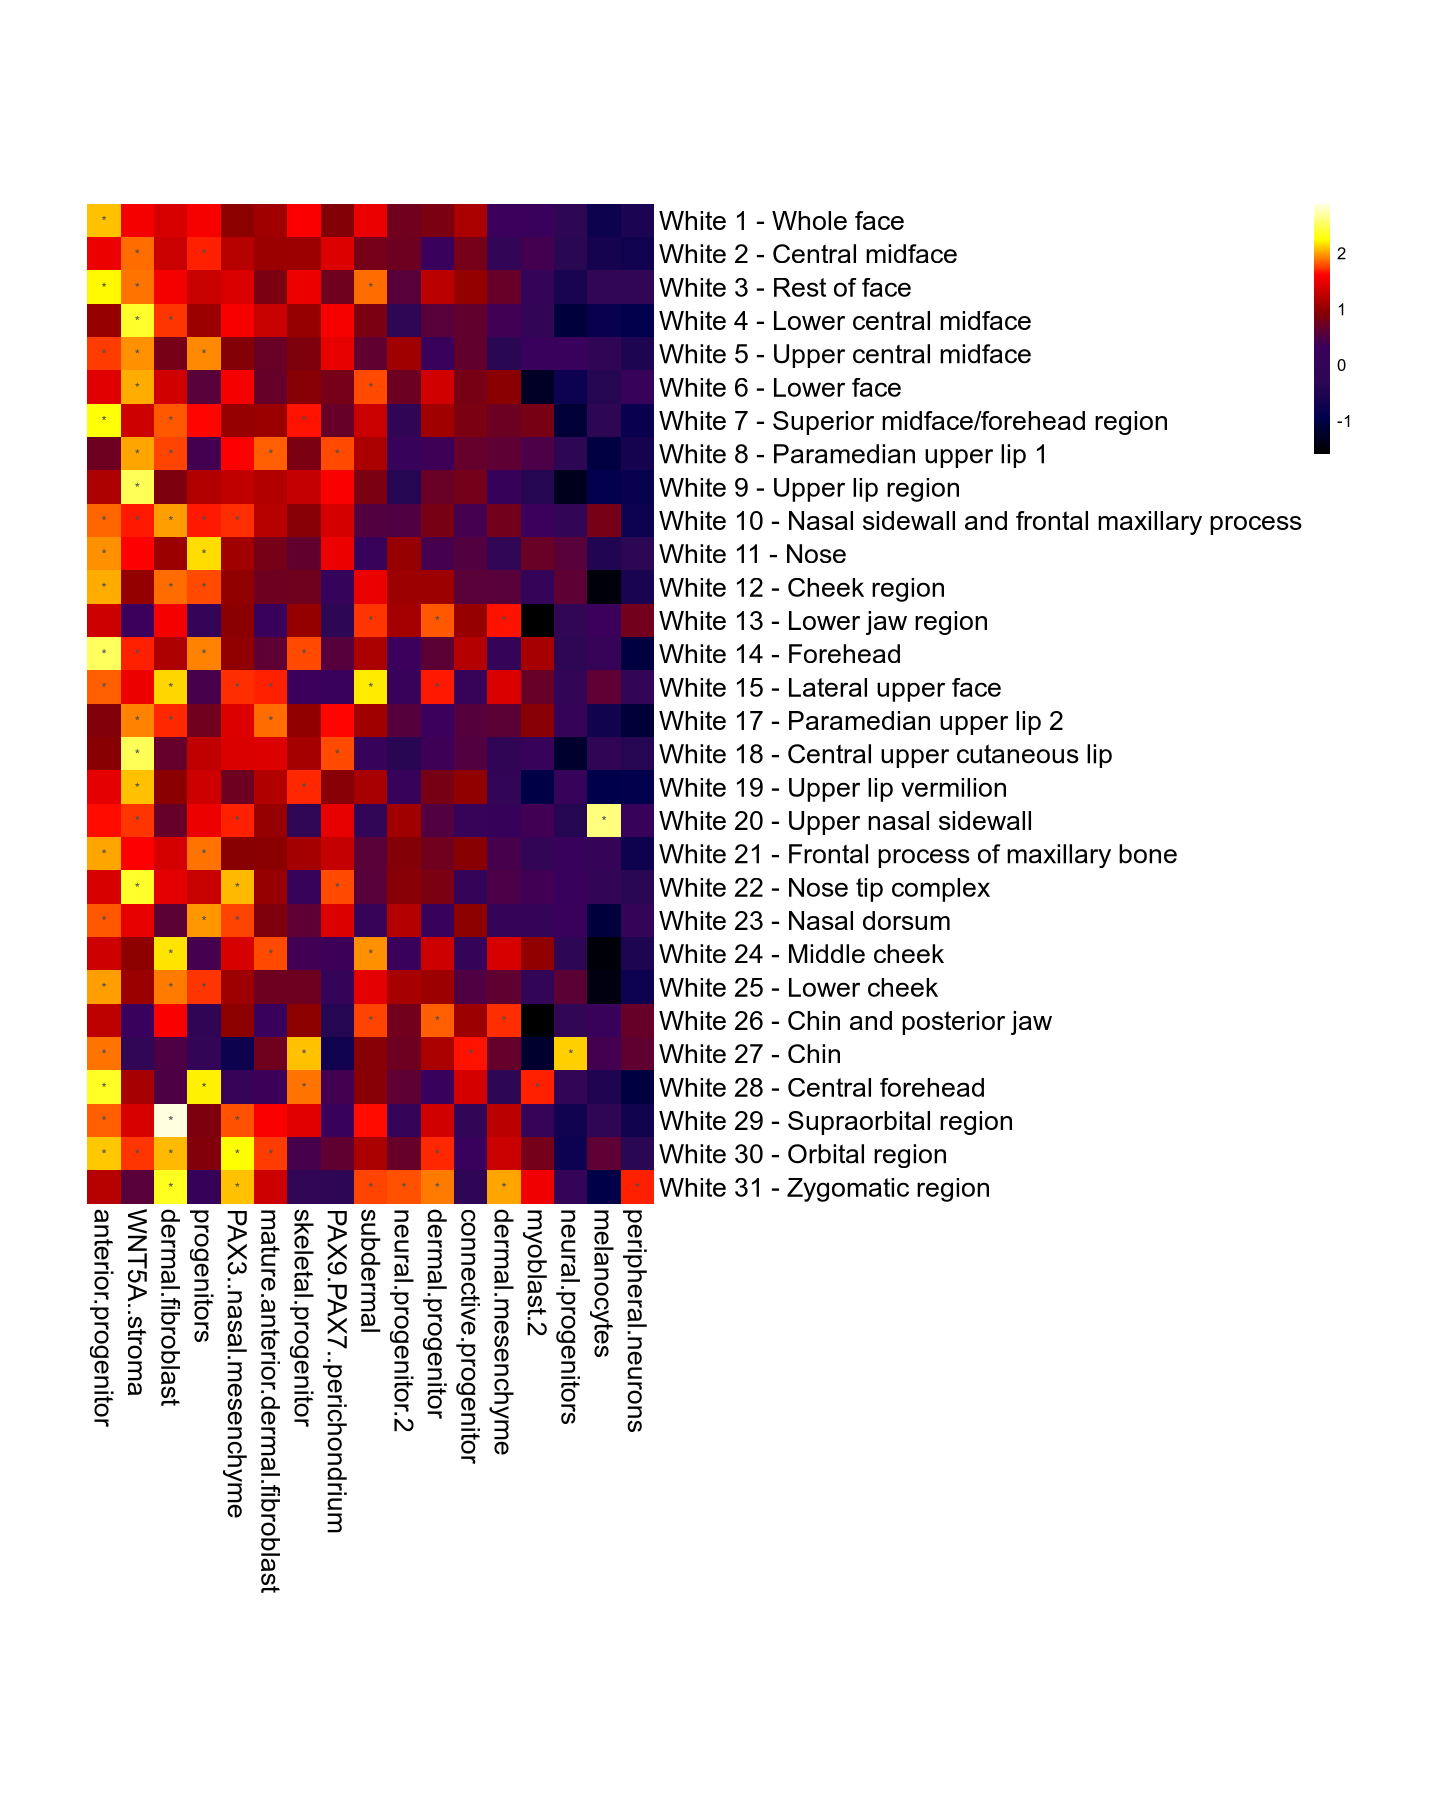

In [23]:
#my_colors <- colorRampPalette(c("black", "#00004D", "#2E0854", "#3A015C", "darkred", "red", "yellow", "#FFFFE0", "white"))(255)
my_colors <- colorRampPalette(c("black", "#00004D", "#2E0854", "#3A015C", "darkred", "red", "yellow", "#FFFFE0"))(255)


pheatmap::pheatmap(
  mat_final,
  display_numbers = stars_final,
  color = my_colors,
  cluster_cols = FALSE,
  cluster_rows = FALSE,
  border_color = NA,
  fontsize_row = 16,
  fontsize_col = 16,
  cellwidth = 20,
  cellheight = 20,
  width = 20,   # Increase plot width (in inches, if in a file device)
  height = 20   # Increase plot height
)

In [28]:
my_colors <- colorRampPalette(c("blue", "white", "red"))(255)
my_colors <- colorRampPalette(c("darkblue", "white", "darkred"))(255)
my_colors <- colorRampPalette(c("#2166AC", "white", "#B2182B"))(255)
my_colors <- colorRampPalette(c("#4393C3", "white", "#D6604D"))(255)


pheatmap::pheatmap(
  mat_final,
  display_numbers = stars_final,
  color = my_colors,
  cluster_cols = FALSE,
  cluster_rows = FALSE,
  border_color = NA,
  fontsize_row = 16,
  fontsize_col = 16,
  cellwidth = 20,
  cellheight = 20,
  filename = "my_heatmap.pdf"   # <-- This does the saving!
)
